# recalculate all properties using NSA v1.0.1

In [1]:
from astropy.table import Table
from astropy.io import fits

import numpy as np

import matplotlib.pyplot as plt

In [115]:
DATA_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/'
NSA_FN = DATA_FOLDER + 'nsa_v1_0_1.fits'
KIAS_FN = DATA_FOLDER + 'NSA_v1_0_1_vflag_Portsmouth.fits'

In [116]:
NSA = Table.read(NSA_FN)
NSA[:5]

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,bytes8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661283 .. 2337.7668,-15.124495 .. -19.915525,293.50247 .. 1094.6666,-0.010805 .. 0.009306902,3.9630737e-05 .. 2.6251464e-06,6833158000.0,0.00017553588 .. 1.14686,0.004447123,0.09061434,0.025269886,0.0
J094630.85-004554.5,09h/m00/J094630.85-004554.5,146.6285851269414,-0.7651620976591762,1,-1,-1,-1,-1,-1,17.318521,0.06465632,sdss,0.06491773,1239,2,175,301,735.56384,1277.3636,1,0.06403577,2.4606192 .. 443.66675,5.447516 .. 0.006137319,1,2.6590455 .. 454.05856,-14.978118 .. -20.68

In [117]:
KIAS = Table.read(KIAS_FN)
KIAS[:5]

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,u_r,g_r,NUV_r,index,imc,aimc,cd,conx1,u_r_KIAS,prmag,BPTclass,SFR,sSFR,HImass,vflag,u_r_err,g_r_err,NUV_r_err,ID,Flux_OII_3726,Flux_OII_3726_Err,AoN_OII_3726,Flux_OII_3728,Flux_OII_3728_Err,AoN_OII_3728,Flux_OIII_4363,Flux_OIII_4363_Err,AoN_OIII_4363,Flux_Hb_4861,Flux_Hb_4861_Err,AoN_Hb_4861,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,AoN_OIII_5006,Flux_NI_5197,Flux_NI_5197_Err,AoN_NI_5197,Flux_NI_5200,Flux_NI_5200_Err,AoN_NI_5200,Flux_OI_6300,Flux_OI_6300_Err,AoN_OI_6300,Flux_OI_6363,Flux_OI_6363_Err,AoN_OI_6363,Flux_NII_6547,Flux_NII_6547_Err,Flux_Ha_6562,Flux_Ha_6562_Err,AoN_Ha_6562,Flux_NII_6583,Flux_NII_6583_Err,AoN_NII_6583,Flux_SII_6716,Flux_SII_6716_Err,AoN_SII_6716,Flux_SII_6730,Flux_SII_6730_Err,AoN_SII_6730
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,bytes8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64,float32,float32,float32,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J023211.77+001326.5,02h/p00/J023211.77+001326.5,38.04906209256324,0.22402153989646575,39438,22721,-1,-1,71327,-1,16.771198,0.054021582,sdss,0.07,109,4,23,301,1960.5631,83.361275,38979,0.054392263,1.3420134 .. 884.58374,16.215242 .. 0.0016165179,1,1.4780203 .. 964.8986,-13.908231 .. -21.045618,24.77356 .. 1073.0248,0.2271526 .. 0.04052578,-0.060923357 .. 0.029009609,1.4557369e-05 .. 1.222673e-15,0.0016189957 .. 1.23927,2.5023096e-06,0.06656253,0.024689334,22540354000.0,156.48558044433594,201.36697387695312,10 .. 11,0.016490662 .. 0.0,5489.7393 .. 0.0,0.21582535 .. -0.09177922,0.0076095443 .. 0.15974313,0.64479166 ..

## Calculate color using NSA elpetro absmag
$$NUV-r$$
$$ u- r$$

In [70]:
KIAS['u_r'] = KIAS['ELPETRO_ABSMAG'][:,2] - KIAS['ELPETRO_ABSMAG'][:,4]

Text(0.5, 0, 'NSA $u - r$')

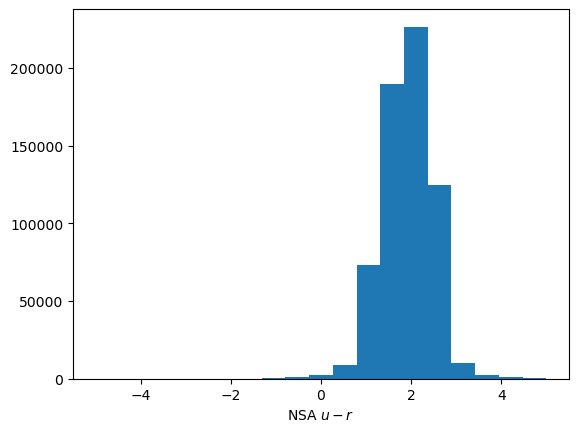

In [71]:
plt.hist(KIAS['u_r'], bins=np.linspace(-5,5,20))
plt.xlabel('NSA $u - r$')

In [72]:
KIAS['NUV_r'] = KIAS['ELPETRO_ABSMAG'][:,1] - KIAS['ELPETRO_ABSMAG'][:,4]

Text(0.5, 0, 'NSA $NUV - r$')

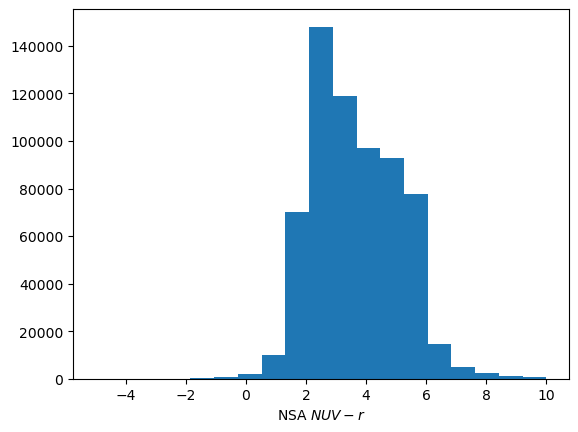

In [73]:
plt.hist(KIAS['NUV_r'], bins=np.linspace(-5,10,20))
plt.xlabel('NSA $NUV - r$')

Text(0, 0.5, 'KIAS $u-r$')

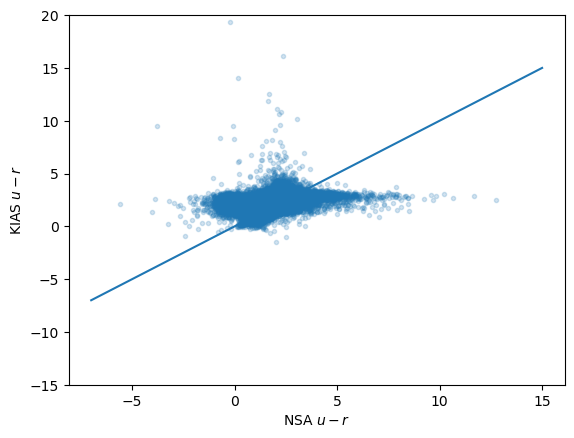

In [88]:
KIAS_compare = KIAS[KIAS['u_r_KIAS']>-99]

plt.scatter(KIAS_compare['u_r'], KIAS_compare['u_r_KIAS'],marker='.', alpha=0.2)
# plt.xlim(-5,30)
plt.ylim(-15,20)
plt.plot([-7,15],[-7,15])
plt.xlabel('NSA $u-r$')
plt.ylabel('KIAS $u-r$')

## Calculate inverse concentration index

$$ c_{\rm inv} = R_{50,i}/R_{90,i}$$

In [74]:
KIAS['cinv'] = KIAS['ELPETRO_TH50'][:,5]/KIAS['ELPETRO_TH90'][:,5]

Text(0.5, 0, 'NSA $c_{\\rm inv}$')

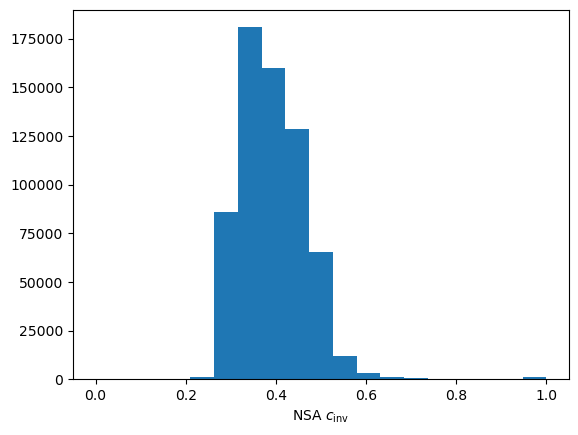

In [75]:
plt.hist(KIAS['cinv'], bins=np.linspace(0,1,20))
plt.xlabel(r'NSA $c_{\rm inv}$')

## calculate color gradient
$$\Delta(g-i) = (g-i)_{0.5R_{Pet,i}<r<R_{Pet,i}} - (g-i)_{r<0.5R_{Pet,i}}$$

using SGA curve of growth model
$$ m(r) = m_{tot} + m_0\ \ln(1+\alpha_1 (r/r_0)^{-\alpha_2})$$
$$r_{50} = r_0(\frac{1}{\alpha_1}(\exp(\frac{-\log(0.5)}{0.4m_0})-1))^{1/\alpha_2}$$

### first calculate colors within $R_{50,i}$
this should be "simple" for the $i$ band
$$m(R_{50,i}) = m_{tot} - \log(0.5)/0.4$$

let's attempt to solve for the free parameters in the SGA curve of growth equation. start with an example galaxy

In [62]:
idx = 123
print('m(2RPet_r): ', NSA['ELPETRO_ABSMAG'][idx][5])
print('R50_i: ', NSA['ELPETRO_TH50'][idx][5])
print('R90_i: ', NSA['ELPETRO_TH90'][idx][5])
print('RPet_r: ', NSA['ELPETRO_THETA_R'][idx])
print('R50_r: ', NSA['ELPETRO_TH50'][idx][4])
print('R90_r: ', NSA['ELPETRO_TH90'][idx][4])

m(2RPet_r):  -21.761341
R50_i:  3.362513
R90_i:  9.956713
RPet_r:  7.9890795
R50_r:  3.663227
R90_r:  9.593311


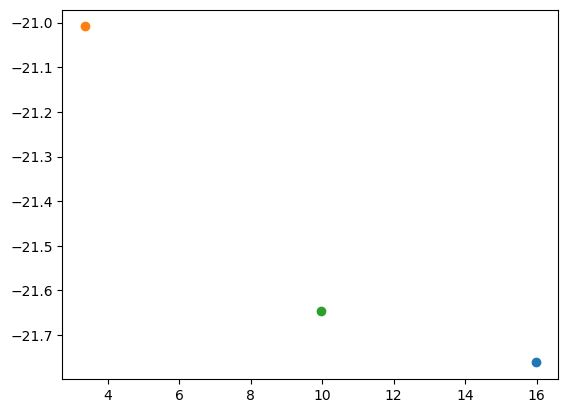

In [59]:
plt.scatter(NSA['ELPETRO_THETA'][idx]*2, NSA['ELPETRO_ABSMAG'][idx][5], label='2$R_{Pet,r}')
plt.scatter(NSA['ELPETRO_TH50'][idx][5], NSA['ELPETRO_ABSMAG'][idx][5] - np.log10(0.5)/0.4, label='2$R_{50,i}')
plt.scatter(NSA['ELPETRO_TH90'][idx][5], NSA['ELPETRO_ABSMAG'][idx][5] - np.log10(0.9)/0.4, label='2$R_{90,i}')

In [53]:
NSA['ELPETRO_THETA']

7.3913364
6.581605
5.5319614
6.0937533
10.235785
3.5014968
7.18387
7.4234877
13.490942
11.186317
14.771707


Text(0.5, 0, '$R_{50,g} - R_{50,i}$')

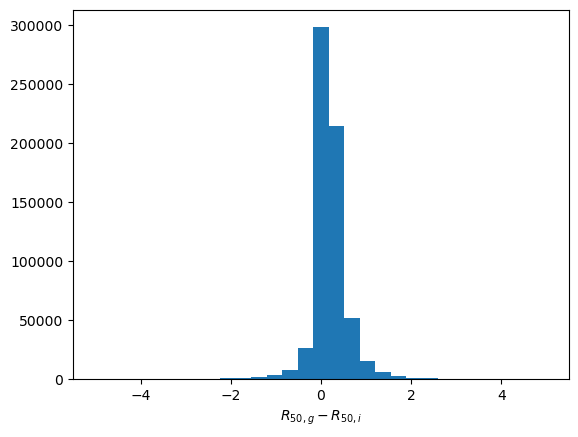

In [41]:
plt.hist(NSA['ELPETRO_TH50'][:,3]-NSA['ELPETRO_TH50'][:,5], bins=np.linspace(-5,5,30))
plt.xlabel('$R_{50,g} - R_{50,i}$')

In [63]:
test = Table.read('/Users/nityaravi/Downloads/J090029.06+300443.9-41-petro-gradient.fits')
test

nsaid,pid,aid,racen,deccen,f50n,f90n,f50g,f90g,f50r,f90r,gmr50,nmr50,gmr90,nmr90
int64,int64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
317532,41,0,135.12112341499204,30.078857466497357,2.739441,9.52705,65.86608,53.77942,116.27677,93.0214,0.6170779,4.069577,0.594917,2.474061


(array([ 1602.,  4552., 11565., 25362., 44977., 61601., 74267., 84683.,
        92070., 61458., 21279.,  9191.,  4670.,  2665.,  1624.,   848.,
          464.,   231.,   137.]),
 array([-0.5       , -0.44736842, -0.39473684, -0.34210526, -0.28947368,
        -0.23684211, -0.18421053, -0.13157895, -0.07894737, -0.02631579,
         0.02631579,  0.07894737,  0.13157895,  0.18421053,  0.23684211,
         0.28947368,  0.34210526,  0.39473684,  0.44736842,  0.5       ]),
 <BarContainer object of 19 artists>)

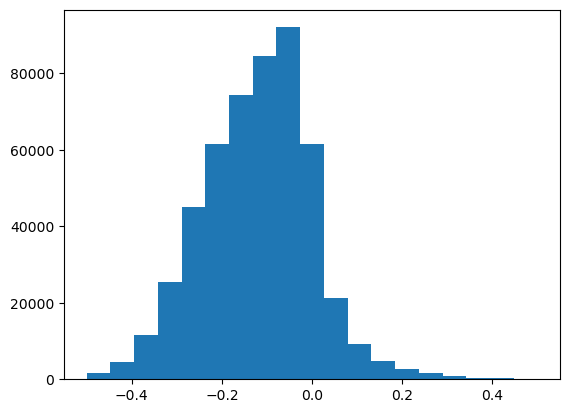

In [100]:
plt.hist(KIAS_compare['cd'], bins=np.linspace(-0.5, 0.5,20))

In [102]:
iau = KIAS[123]['IAUNAME']

In [120]:
icog = Table.read(DATA_FOLDER + 'nsa/cog/' + iau+ '-8-i-cog.fits')
gcog = Table.read(DATA_FOLDER + 'nsa/cog/' + iau+ '-8-g-cog.fits')
petro = Table.read(DATA_FOLDER + 'nsa/petro/' + iau+ '-8-petro.fits')


In [104]:
icog

nsaid,racen,deccen,pixscale,rbins,fbins,vbins,abins,meansb,sb,rlobins,rhibins,alobins,ahibins,flobins,fhibins
int64,float64,float64,float32,float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239]
40094,46.3623017248186,0.8624933853392395,0.396,1.0 .. 239.0,9.318968 .. 458.3696,0.019716768 .. 971.70166,2.0289385 .. 69603.91,4.593026 .. 0.006585401,2.8146083 .. -0.00073271483,0.0 .. 191.2,2.0 .. 298.75,0.0 .. 60583.78,8.115754 .. 72955.91,0.0 .. 465.29846,22.842669 .. 456.23322


In [105]:
gcog

nsaid,racen,deccen,pixscale,rbins,fbins,vbins,abins,meansb,sb,rlobins,rhibins,alobins,ahibins,flobins,fhibins
int64,float64,float64,float32,float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239],float32[239]
40094,46.3623017248186,0.8624933853392395,0.396,1.0 .. 239.0,1.828996 .. 92.10839,0.003453209 .. 245.1459,2.0289385 .. 69603.91,0.9014546 .. 0.0013233222,0.61867297 .. -0.0009623039,0.0 .. 191.2,2.0 .. 298.75,0.0 .. 60583.78,8.115754 .. 72955.91,0.0 .. 102.12629,5.020998 .. 90.22055


In [121]:
petro

nsaid,pid,aid,racen,deccen,xcen,ycen,ba,phi,petroflux_r,petroivar_r,petrotheta_r,petroth50_r,petroth90_r,petrotheta,petroflux,petroivar,petroth50,petroth90
int64,int64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7]
40094,8,0,46.3623017248186,0.8624933853392395,125.229805,145.5026,0.64583117,128.47804,254.03694,0.2715226,9.193935,4.339444,11.352019,9.193935,0.9849849 .. 515.91534,37.117695 .. 0.015299115,5.584679 .. 4.126953,9.551155 .. 10.411917


In [119]:
NSA[NSA['IAUNAME'] == iau]['ELPETRO_THETA']

9.193935


Text(0, 0.5, 'flux [nanomaggies]')

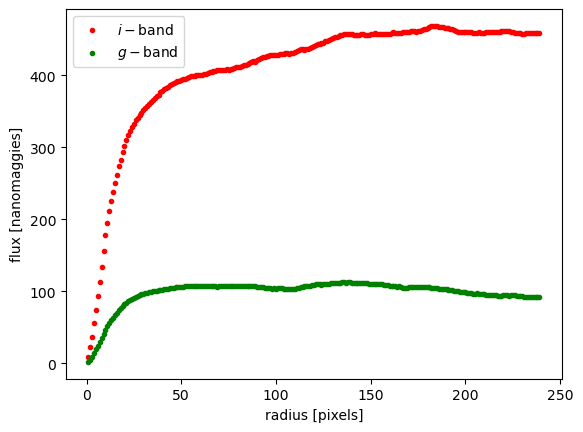

In [114]:
plt.scatter(icog['rbins'], icog['fbins'], marker='.', label='$i-$band', color='r')
plt.scatter(gcog['rbins'], gcog['fbins'], marker='.', label='$g-$band', color='g')
plt.legend()
plt.xlabel('radius [pixels]')
plt.ylabel('flux [nanomaggies]')

Text(0, 0.5, 'flux [nanomaggies]')

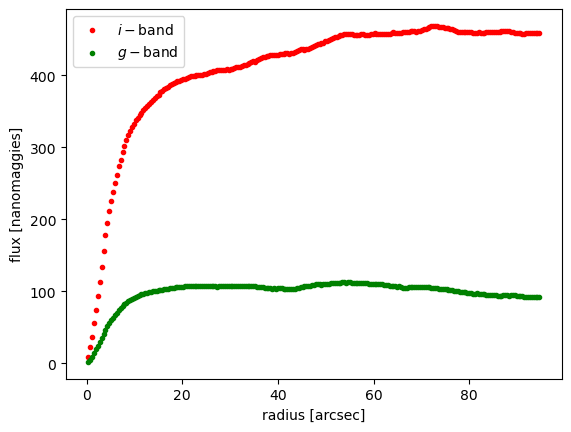

In [113]:
plt.scatter(icog['rbins']*icog['pixscale'], icog['fbins'], marker='.', label='$i-$band', color='r')
plt.scatter(gcog['rbins']*gcog['pixscale'], gcog['fbins'], marker='.', label='$g-$band', color='g')
plt.legend()
plt.xlabel('radius [arcsec]')
plt.ylabel('flux [nanomaggies]')